# Lesson 1: Advanced RAG Pipeline

In [1]:
import utils

import os
import openai
openai.api_key = utils.get_openai_api_key()

✅ In Answer Relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In Answer Relevance, input response will be set to __record__.main_output or `Select.RecordOutput` .
✅ In Context Relevance, input prompt will be set to __record__.main_input or `Select.RecordInput` .
✅ In Context Relevance, input response will be set to __record__.app.query.rets.source_nodes[:].node.text .
✅ In Groundedness, input source will be set to __record__.app.query.rets.source_nodes[:].node.text .
✅ In Groundedness, input statement will be set to __record__.main_output or `Select.RecordOutput` .


In [2]:
from llama_index import SimpleDirectoryReader

documents = SimpleDirectoryReader(
    input_files=["./eBook-How-to-Build-a-Career-in-AI.pdf"]
).load_data()

In [3]:
print(type(documents), "\n")
print(len(documents), "\n")
print(type(documents[0]))
print(documents[0])

<class 'list'> 

41 

<class 'llama_index.schema.Document'>
Doc ID: d97e8d76-367b-4afe-9ba6-ecd345ece2f5
Text: PAGE 1Founder, DeepLearning.AICollected Insights from Andrew Ng
How to  Build Your Career in AIA Simple Guide


## Basic RAG pipeline

In [4]:
from llama_index import Document

document = Document(text="\n\n".join([doc.text for doc in documents]))

In [5]:
from llama_index import VectorStoreIndex
from llama_index import ServiceContext ## LLM and Embedding model config
from llama_index.llms import OpenAI

llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)
service_context = ServiceContext.from_defaults(
    llm=llm, embed_model="local:BAAI/bge-small-en-v1.5"
)
index = VectorStoreIndex.from_documents([document],
                                        service_context=service_context)

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
query_engine = index.as_query_engine()

In [7]:
response = query_engine.query(
    "What are steps to take when finding projects to build your experience?"
)
print(str(response))

When finding projects to build your experience, there are several steps you can take. First, you can join existing projects by asking to join someone else's project if they have an idea. Additionally, you can continue reading, taking courses, and talking to domain experts to come up with new ideas. It is also helpful to focus on a specific application area where machine learning has not yet been applied. If your company or school has a particular application in mind, explore the possibilities for machine learning in that area. Finally, you can develop a side hustle or personal project that may not initially be part of your job but can still contribute to your growth and skill progression.


## Evaluation setup using TruLens 

Now we will setup Evaluation pipeline as well for above RAG

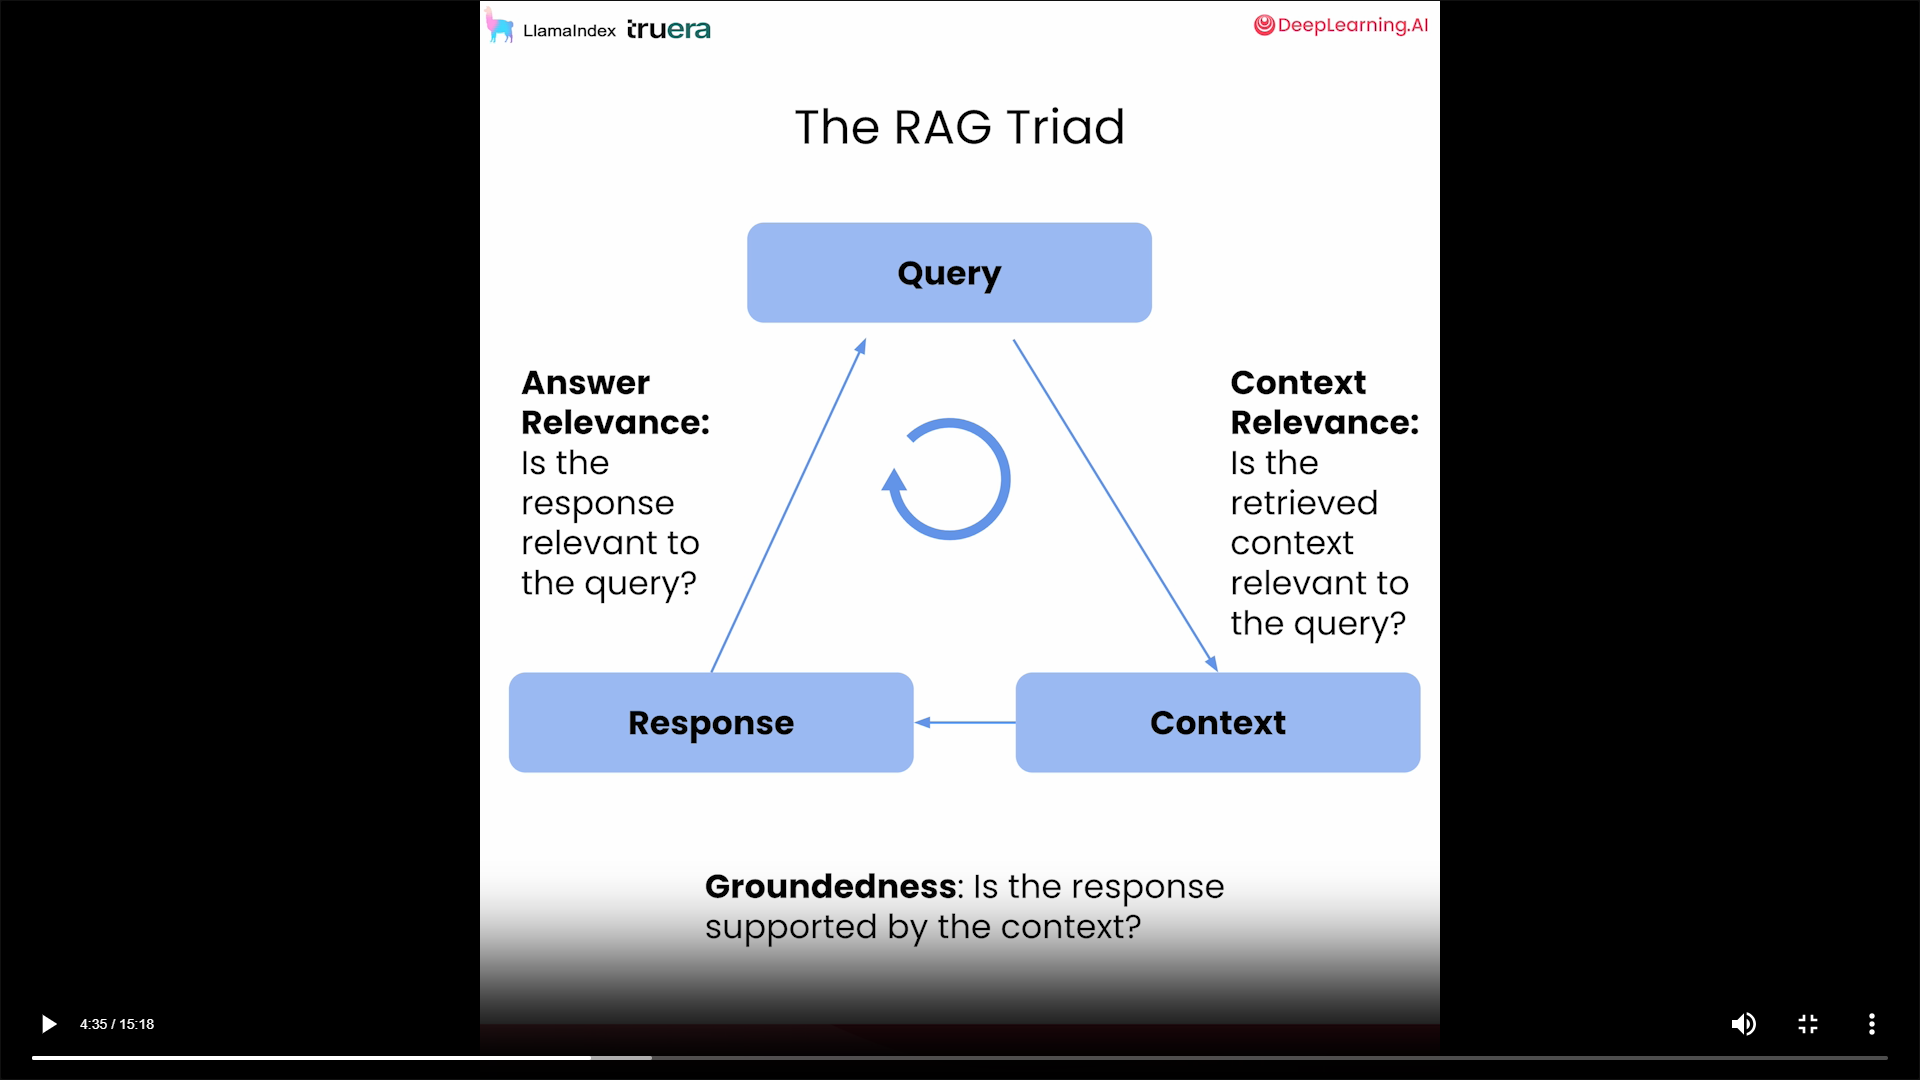

In [8]:
eval_questions = []
with open('eval_questions.txt', 'r') as file:
    for line in file:
        # Remove newline character and convert to integer
        item = line.strip()
        print(item)
        eval_questions.append(item)

What are the keys to building a career in AI?
How can teamwork contribute to success in AI?
What is the importance of networking in AI?
What are some good habits to develop for a successful career?
How can altruism be beneficial in building a career?
What is imposter syndrome and how does it relate to AI?
Who are some accomplished individuals who have experienced imposter syndrome?
What is the first step to becoming good at AI?
What are some common challenges in AI?
Is it normal to find parts of AI challenging?


In [26]:
# You can try your own question:
new_question = "What is the right AI job for me?"
eval_questions.append(new_question)

In [27]:
print(eval_questions)

['What are the keys to building a career in AI?', 'How can teamwork contribute to success in AI?', 'What is the importance of networking in AI?', 'What are some good habits to develop for a successful career?', 'How can altruism be beneficial in building a career?', 'What is imposter syndrome and how does it relate to AI?', 'Who are some accomplished individuals who have experienced imposter syndrome?', 'What is the first step to becoming good at AI?', 'What are some common challenges in AI?', 'Is it normal to find parts of AI challenging?', 'What is the right AI job for me?', 'What is the right AI job for me?']


In [28]:
from trulens_eval import Tru
tru = Tru()

tru.reset_database()

For the classroom, we've written some of the code in helper functions inside a utils.py file.  
- You can view the utils.py file in the file directory by clicking on the "Jupyter" logo at the top of the notebook.
- In later lessons, you'll get to work directly with the code that's currently wrapped inside these helper functions, to give you more options to customize your RAG pipeline.

In [29]:
from utils import get_prebuilt_trulens_recorder

tru_recorder = get_prebuilt_trulens_recorder(query_engine,
                                             app_id="Direct Query Engine")

In [30]:
## Now we will run our RAG on eval questions. We have also used TruRecorder which will record all data for evaluation
with tru_recorder as recording:
    for question in eval_questions:
        response = query_engine.query(question)

In [31]:
records, feedback = tru.get_records_and_feedback(app_ids=[])

In [32]:
records.head()

,app_id,app_json,type,record_id,input,output,tags,record_json,cost_json,perf_json,ts,Answer Relevance,Context Relevance,Groundedness,Answer Relevance_calls,Context Relevance_calls,Groundedness_calls,latency,total_tokens,total_cost
0,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_2589bce17ffd671a5043b53e92bdaa39,"""What are the keys to building a career in AI?""","""The keys to building a career in AI are learn...",-,"{""record_id"": ""record_hash_2589bce17ffd671a504...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-12-27T02:09:30.834462"", ""...",2023-12-27T02:09:34.692977,1.0,0.9,1.00,[{'args': {'prompt': 'What are the keys to bui...,[{'args': {'prompt': 'What are the keys to bui...,"[{'args': {'source': 'PAGE 1Founder, DeepLearn...",3,2181,0.003354
1,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_c9d11815c11b6f42566508b842380093,"""How can teamwork contribute to success in AI?""","""Collaborating and working in teams is crucial...",-,"{""record_id"": ""record_hash_c9d11815c11b6f42566...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-12-27T02:09:34.984512"", ""...",2023-12-27T02:09:38.207411,1.0,0.0,1.00,[{'args': {'prompt': 'How can teamwork contrib...,[{'args': {'prompt': 'How can teamwork contrib...,[{'args': {'source': 'Hopefully the previous c...,3,1725,0.002638
2,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_47c02f15a44210a28714b7333ca0bee5,"""What is the importance of networking in AI?""","""Networking is important in AI because it help...",-,"{""record_id"": ""record_hash_47c02f15a44210a2871...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-12-27T02:09:38.516122"", ""...",2023-12-27T02:09:41.098647,1.0,0.1,1.00,[{'args': {'prompt': 'What is the importance o...,[{'args': {'prompt': 'What is the importance o...,[{'args': {'source': 'Hopefully the previous c...,2,1713,0.002613
3,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_3ba305a9ee898e3e156c73f3e18007df,"""What are some good habits to develop for a su...","""Developing good habits is crucial for a succe...",-,"{""record_id"": ""record_hash_3ba305a9ee898e3e156...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-12-27T02:09:41.391257"", ""...",2023-12-27T02:09:44.083590,1.0,0.6,0.75,[{'args': {'prompt': 'What are some good habit...,[{'args': {'prompt': 'What are some good habit...,[{'args': {'source': 'Hopefully the previous c...,2,1676,0.002554
4,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_21f54621001eb4818526ab5168808a41,"""How can altruism be beneficial in building a ...","""Altruism can be beneficial in building a care...",-,"{""record_id"": ""record_hash_21f54621001eb481852...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-12-27T02:09:44.360310"", ""...",2023-12-27T02:09:46.513071,1.0,0.0,0.50,[{'args': {'prompt': 'How can altruism be bene...,[{'args': {'prompt': 'How can altruism be bene...,[{'args': {'source': 'Hopefully the previous c...,2,1668,0.002539


In [33]:
# launches on http://localhost:8501/
tru.run_dashboard()

Starting dashboard ...
Config file already exists. Skipping writing process.
Credentials file already exists. Skipping writing process.
Dashboard already running at path: https://s172-31-9-39p31898.lab-aws-production.deeplearning.ai/


<Popen: returncode: None args: ['streamlit', 'run', '--server.headless=True'...>

In above screenshot you can see that Grounded Relevance and Answer Relevance are High . But context relevance is very low. Now we will use advance retrieval methods 

## Advanced RAG pipeline

### 1. Sentence Window retrieval

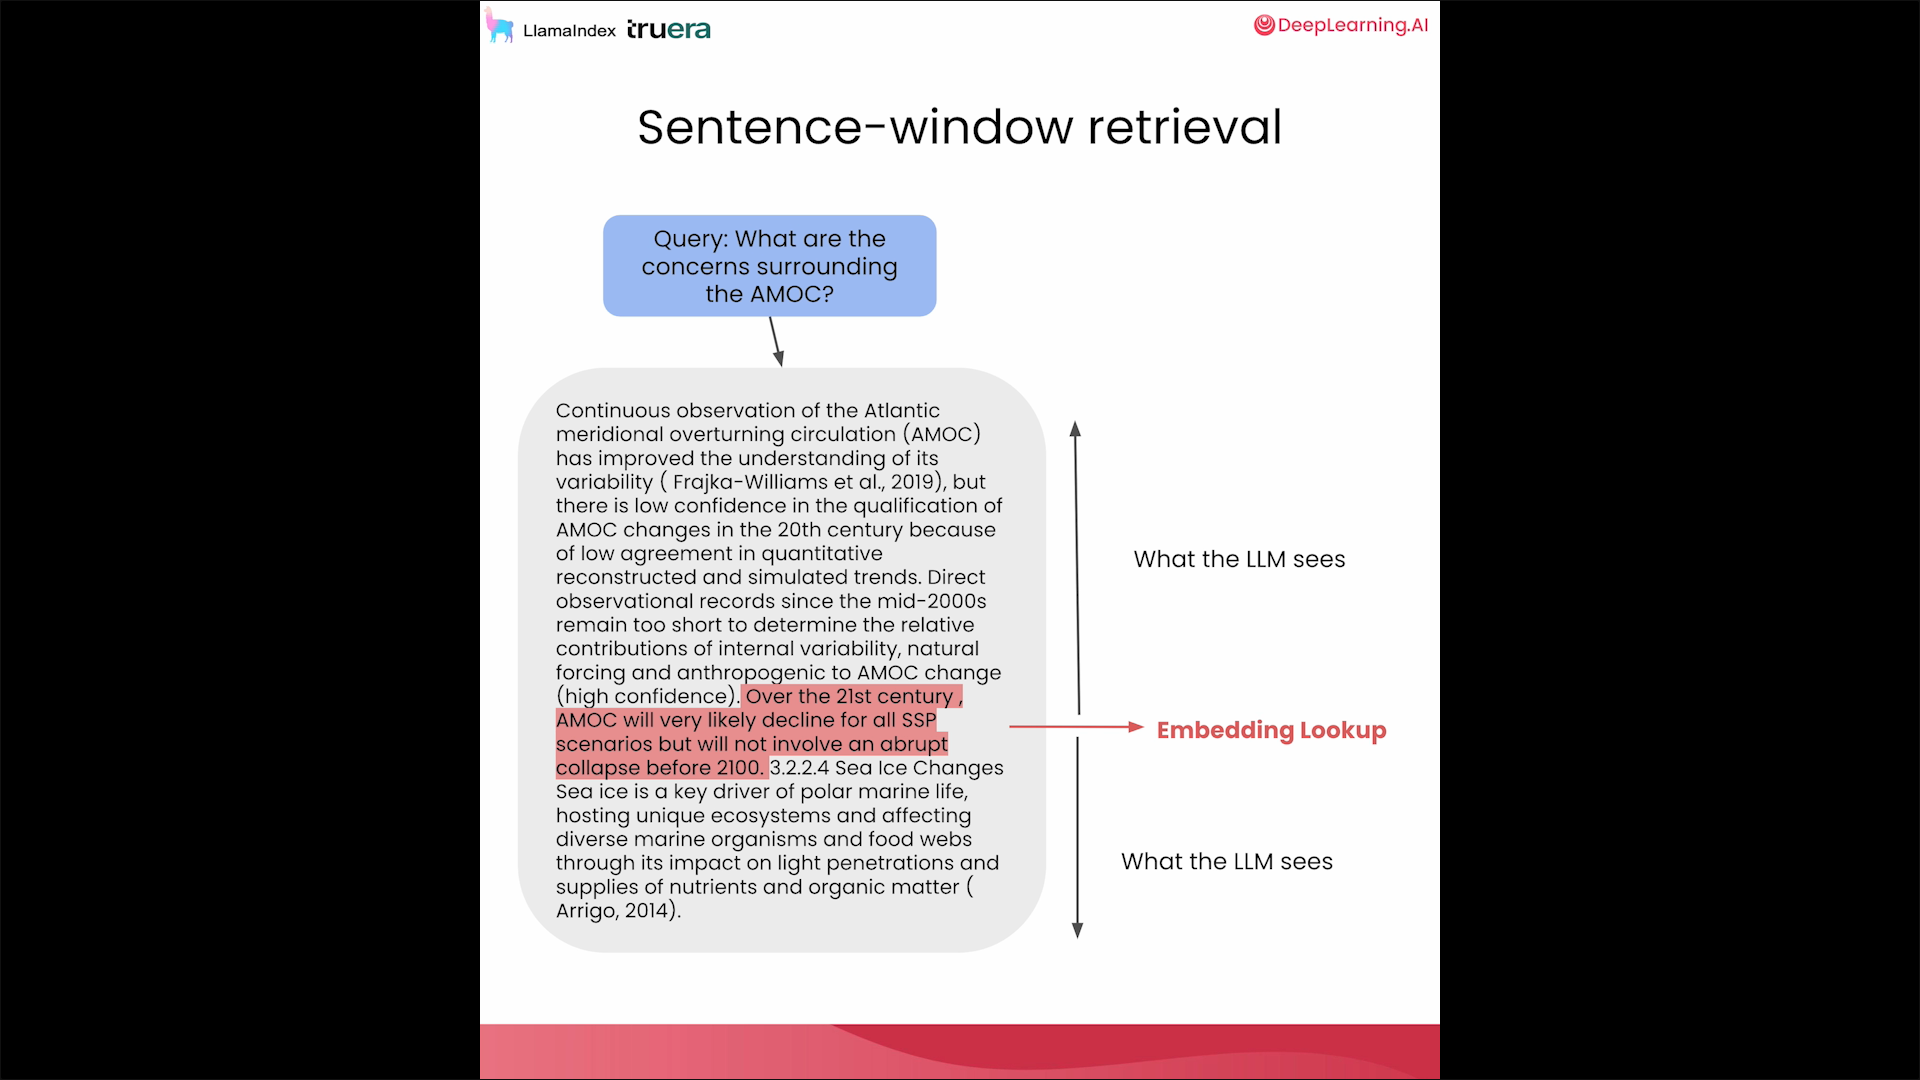

In [34]:
from llama_index.llms import OpenAI

llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)

In [35]:
from utils import build_sentence_window_index

sentence_index = build_sentence_window_index(
    document,
    llm,
    embed_model="local:BAAI/bge-small-en-v1.5",
    save_dir="sentence_index"
)

In [36]:
from utils import get_sentence_window_query_engine

sentence_window_engine = get_sentence_window_query_engine(sentence_index)

In [37]:
window_response = sentence_window_engine.query(
    "how do I get started on a personal project in AI?"
)
print(str(window_response))

To get started on a personal project in AI, it is important to first identify and scope the project. Consider your career goals and choose a project that complements them. Ensure that the project is responsible, ethical, and beneficial to people. As you progress in your career, aim for projects that grow in scope, complexity, and impact over time. Building a portfolio of projects that shows skill progression can also be helpful. Additionally, consider using a simple framework for starting your AI job search and utilize informational interviews to find the right job in the AI field.


In [38]:
tru.reset_database()

tru_recorder_sentence_window = get_prebuilt_trulens_recorder(
    sentence_window_engine,
    app_id = "Sentence Window Query Engine"
)

In [39]:
for question in eval_questions:
    with tru_recorder_sentence_window as recording:
        response = sentence_window_engine.query(question)
        print(question)
        print(str(response))

A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function BaseQueryEngine.query at 0x7f2b85c86ef0>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.
A new object of type <class 'llama_index.indices.vector_store.retrievers.retriever.VectorIndexRetriever'> at 0x7f2a08dfc8e0 is calling an instrumented method <function BaseRetriever.retrieve at 0x7f2b85c86290>. The path of this call may be incorrect.
Guessing path of new object is app.retriever based on other obj

What are the keys to building a career in AI?
The keys to building a career in AI are learning foundational technical skills, working on projects, and finding a job, all of which is supported by being part of a community.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


How can teamwork contribute to success in AI?
Teamwork can contribute to success in AI by allowing individuals to leverage the expertise and insights of their colleagues. When working on larger AI projects that require collaboration, the ability to lead and work effectively as a team becomes crucial. By working together, team members can share their deep technical insights, make informed decisions about technical architecture or data collection, and ultimately improve the project. Additionally, being surrounded by colleagues who are dedicated, hardworking, and continuously learning can inspire individuals to do the same, leading to greater success in AI endeavors.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is the importance of networking in AI?
Networking is important in AI because it allows individuals to connect with others who have experience and knowledge in the field. By reaching out to people in their network, such as friends or alumni, individuals can gain valuable insights and advice. Networking also provides opportunities for informational interviews, where individuals can learn more about specific positions and companies in the AI field. This can help individuals prepare for future job searches and make informed decisions about their career path in AI.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What are some good habits to develop for a successful career?
Developing good habits in areas such as eating, exercise, sleep, personal relationships, work, learning, and self-care can contribute to a successful career. These habits help individuals move forward while staying healthy and can have a positive impact on their overall well-being and productivity.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


How can altruism be beneficial in building a career?
Altruism can be beneficial in building a career by helping others while also advancing one's own career. By aiming to lift others during every step of their own journey, individuals can achieve better outcomes for themselves. This can be done by offering support, guidance, and assistance to others in their professional endeavors. By helping others succeed, individuals can build strong relationships, expand their network, and gain a positive reputation in their field. Additionally, acts of altruism can provide a sense of fulfillment and purpose, which can contribute to overall career satisfaction and well-being.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is imposter syndrome and how does it relate to AI?
Imposter syndrome is a psychological phenomenon where individuals doubt their own abilities and fear being exposed as a fraud, despite evidence of their success. In the context of AI, newcomers to the field sometimes experience imposter syndrome, questioning whether they truly belong in the AI community and if they are competent enough. It is important to address imposter syndrome in order to encourage individuals to continue growing in AI and not let self-doubt hinder their progress.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


Who are some accomplished individuals who have experienced imposter syndrome?
Sheryl Sandberg, Michelle Obama, Tom Hanks, and Mike Cannon-Brookes are some accomplished individuals who have experienced imposter syndrome.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is the first step to becoming good at AI?
The first step to becoming good at AI is to learn foundational technical skills.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What are some common challenges in AI?
Some common challenges in AI include keeping up-to-date with evolving technology, finding suitable projects and estimating timelines and return on investment, managing the highly iterative nature of AI projects, collaborating with stakeholders who lack expertise in AI, and struggling with technical challenges while reading research papers or tuning neural network hyperparameters.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


Is it normal to find parts of AI challenging?
Yes, it is normal to find parts of AI challenging. The author mentions that they still find many research papers challenging to read and have made mistakes while working with neural networks. They also assure the reader that everyone who has published a seminal AI paper has struggled with similar technical challenges at some point. Therefore, it is clear that finding parts of AI challenging is a common experience.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a08dfd150 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is the right AI job for me?
The right AI job for you can be found by following the steps outlined in Chapter 9: Finding the Right AI Job for You. This chapter provides guidance on how to identify and pursue AI job opportunities that align with your skills, interests, and career goals. Additionally, Chapter 8: Using Informational Interviews to Find the Right Job offers valuable insights on how to gather information and make informed decisions about potential AI job opportunities. By utilizing the frameworks and strategies discussed in these chapters, you can increase your chances of finding the right AI job for you.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a08dfc9a0 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.


What is the right AI job for me?
The right AI job for you is one that complements your career goals and allows you to showcase skill progression through a portfolio of projects. It is important to start your AI job search with a simple framework and utilize informational interviews to find the right job. Additionally, building a career in AI requires overcoming imposter syndrome and understanding the keys to success in the field.


In [40]:
tru.get_leaderboard(app_ids=[])

,Groundedness,Context Relevance,Answer Relevance,latency,total_cost
app_id,,,,,
Sentence Window Query Engine,0.865,0.236364,0.981818,7.25,0.000828


In [41]:
# launches on http://localhost:8501/
tru.run_dashboard()

Starting dashboard ...
Config file already exists. Skipping writing process.
Credentials file already exists. Skipping writing process.
Dashboard already running at path: https://s172-31-9-39p31898.lab-aws-production.deeplearning.ai/


<Popen: returncode: None args: ['streamlit', 'run', '--server.headless=True'...>

### 2. Auto-merging retrieval

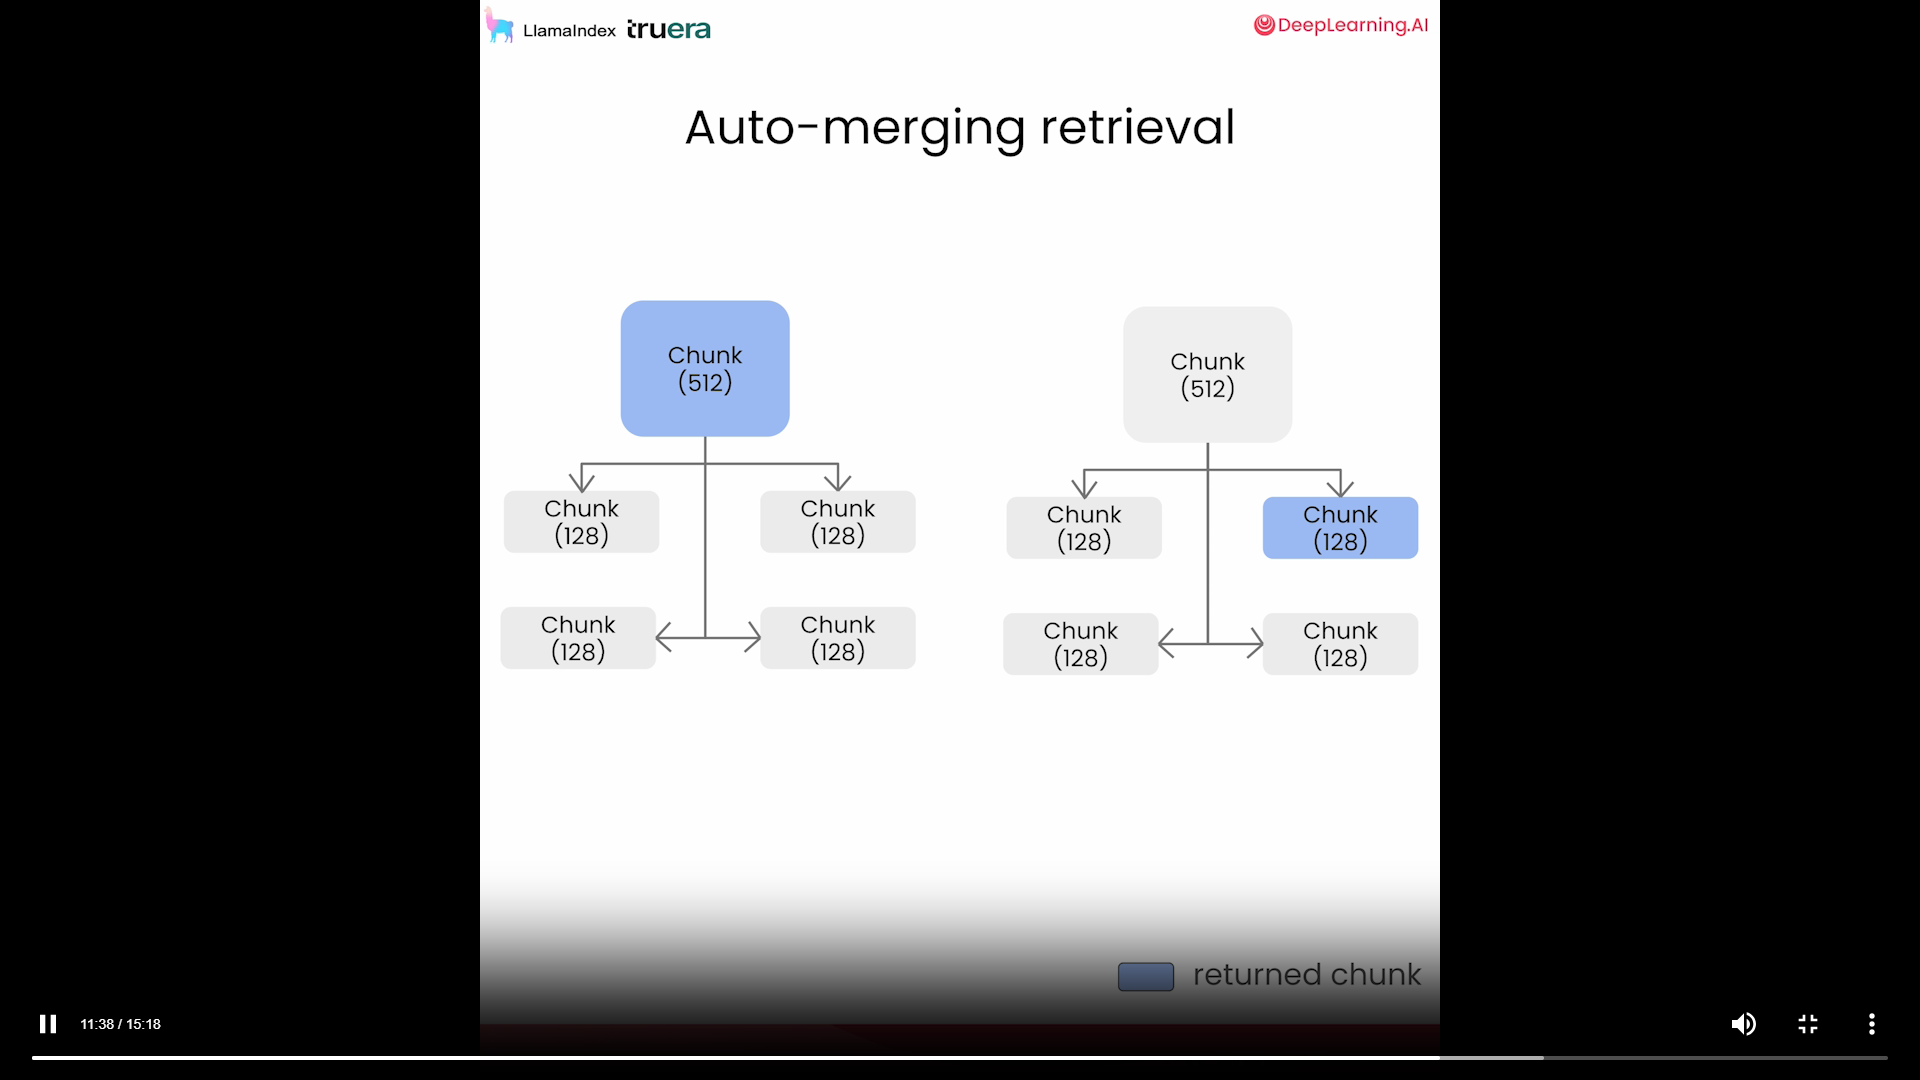

In [42]:
from utils import build_automerging_index

automerging_index = build_automerging_index(
    documents,
    llm,
    embed_model="local:BAAI/bge-small-en-v1.5",
    save_dir="merging_index"
)

In [43]:
from utils import get_automerging_query_engine

automerging_query_engine = get_automerging_query_engine(
    automerging_index,
)

In [44]:
auto_merging_response = automerging_query_engine.query(
    "How do I build a portfolio of AI projects?"
)
print(str(auto_merging_response))

> Merging 1 nodes into parent node.
> Parent node id: 5ba6a2b5-9a70-4940-9550-9fdf97d0c99e.
> Parent node text: PAGE 21Building a Portfolio of 
Projects that Shows 
Skill Progression CHAPTER 6
PROJECTS

> Merging 1 nodes into parent node.
> Parent node id: 6b5cf557-bd16-4c7d-8979-bbf32379abf4.
> Parent node text: PAGE 21Building a Portfolio of 
Projects that Shows 
Skill Progression CHAPTER 6
PROJECTS

To build a portfolio of AI projects, it is important to start with simple undertakings and gradually progress to more complex ones. This progression over time will demonstrate your growth and development in the field. Additionally, effective communication is crucial in order to explain your thinking and showcase the value of your work. Being able to articulate your ideas will help others see the potential in your projects and trust you with resources for larger endeavors.


In [45]:
tru.reset_database()

tru_recorder_automerging = get_prebuilt_trulens_recorder(automerging_query_engine,
                                                         app_id="Automerging Query Engine")

In [46]:
for question in eval_questions:
    with tru_recorder_automerging as recording:
        response = automerging_query_engine.query(question)
        print(question)
        print(response)

A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function BaseQueryEngine.query at 0x7f2b85c86ef0>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.
A new object of type <class 'llama_index.retrievers.auto_merging_retriever.AutoMergingRetriever'> at 0x7f2a08c74640 is calling an instrumented method <function BaseRetriever.retrieve at 0x7f2b85c86290>. The path of this call may be incorrect.
Guessing path of new object is app.retriever based on other object (0x7

> Merging 2 nodes into parent node.
> Parent node id: e9981f40-a479-4ae0-9f06-71d945656b8e.
> Parent node text: PAGE 3Table of 
ContentsIntroduction: Coding AI is the New Literacy.
Chapter 1: Three Steps to Ca...

> Merging 1 nodes into parent node.
> Parent node id: 0744b6c0-593a-4bf9-93c9-4590681b76d7.
> Parent node text: PAGE 3Table of 
ContentsIntroduction: Coding AI is the New Literacy.
Chapter 1: Three Steps to Ca...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function CompactAndRefine.get_response at 0x7f2b856c5ea0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.llm_predictor.base.LLMPredictor'> at 0x7f2a08d0d340 is calling an instrumented method <function LLMPredictor.predict at 0x7f2b8d3880d0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthes

What are the keys to building a career in AI?
The keys to building a career in AI include learning foundational technical skills, working on projects, finding a job, and being part of a community. Additionally, collaborating with others and being able to influence and be influenced by others is critical for success in AI.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


How can teamwork contribute to success in AI?
Teamwork can contribute to success in AI by allowing individuals to collaborate with others, influence their team members, and be influenced by them. This ability to work together in a team is critical in tackling large projects and achieving better results compared to working individually. Additionally, teamwork helps in developing interpersonal and communication skills, which are essential in the field of AI.
> Merging 3 nodes into parent node.
> Parent node id: f6dd3624-f198-4adc-8a85-11b475524336.
> Parent node text: PAGE 35Keys to Building a Career in AI CHAPTER 10
The path to career success in AI is more comple...

> Merging 1 nodes into parent node.
> Parent node id: 5669306c-c68f-4aac-b583-ab93286a5456.
> Parent node text: PAGE 35Keys to Building a Career in AI CHAPTER 10
The path to career success in AI is more comple...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is the importance of networking in AI?
Networking is important in AI because it helps in building a strong professional network and community. This network can provide support, advice, and help when needed. It can also help in meeting new people and making friends within the industry. Building a strong network can be beneficial for career growth and advancement in AI.
> Merging 2 nodes into parent node.
> Parent node id: 07c703c2-5bf5-427d-8319-710ad86694f4.
> Parent node text: PAGE 36Keys to Building a Career in AI CHAPTER 10
Of all the steps in building a career, this 
on...

> Merging 2 nodes into parent node.
> Parent node id: 473d35d2-8efc-4624-ba98-53dcb4108ff1.
> Parent node text: PAGE 11
The Best Way to Build 
a New Habit
One of my favorite books is BJ Fogg’s, Tiny Habits: Th...

> Merging 1 nodes into parent node.
> Parent node id: 6b04ea26-52cb-405e-941a-987c6ba901b6.
> Parent node text: PAGE 36Keys to Building a Career in AI CHAPTER 10
Of all the steps in building a car

A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What are some good habits to develop for a successful career?
Developing good habits in eating, exercise, sleep, personal relationships, work, learning, and self-care can help in building a successful career.
> Merging 2 nodes into parent node.
> Parent node id: ccf9fde9-24ea-44e7-8982-12d0971fd5ff.
> Parent node text: PAGE 30Finding someone to interview isn’t always easy, but many people who are in senior position...

> Merging 1 nodes into parent node.
> Parent node id: 6570608b-8ef3-487f-a284-b9aa3135f90e.
> Parent node text: PAGE 30Finding someone to interview isn’t always easy, but many people who are in senior position...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


How can altruism be beneficial in building a career?
Altruism can be beneficial in building a career by helping others even as we pursue our own career goals. When we aim to lift others during every step of our own journey, we often achieve better outcomes for ourselves. By being altruistic and helping others, we can build a strong network and community, receive valuable information and guidance, and potentially receive referrals to potential employers. This can ultimately contribute to our own career growth and success.
> Merging 5 nodes into parent node.
> Parent node id: f0dad1db-04a4-4ffe-9a38-182a467179c5.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...

> Merging 1 nodes into parent node.
> Parent node id: cfc0e31d-15db-4372-9e5a-e6bf6bf852b5.
> Parent node text: PAGE 37Overcoming Imposter 
SyndromeCHAPTER 11

> Merging 3 nodes into parent node.
> Parent node id: a43fa5b8-f459-4c51-810e-61e4828df8b2.
> Paren

A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is imposter syndrome and how does it relate to AI?
Imposter syndrome is a psychological phenomenon where individuals doubt their accomplishments and have a persistent fear of being exposed as a fraud, despite evidence of their competence. In the context of AI, imposter syndrome can affect newcomers to the field who may question their abilities and feel like they don't belong in the AI community, regardless of their success. The passage emphasizes that imposter syndrome is common, even among accomplished individuals, and encourages everyone who wants to join the AI community to be welcomed and supported. It acknowledges that AI can be technically complex and challenging, but reassures readers that struggling with certain aspects of AI is normal and part of the learning process.
> Merging 3 nodes into parent node.
> Parent node id: f0dad1db-04a4-4ffe-9a38-182a467179c5.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matt

A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.


Who are some accomplished individuals who have experienced imposter syndrome?
Sheryl Sandberg, Michelle Obama, Tom Hanks, and Mike Cannon-Brookes are some accomplished individuals who have experienced imposter syndrome.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based 

What is the first step to becoming good at AI?
The first step to becoming good at AI is to suck at it.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What are some common challenges in AI?
Some common challenges in AI include the highly iterative nature of AI projects and the difficulty in coming up with a plan for building a system when the time required to achieve the target accuracy is unknown. Additionally, technical challenges are often encountered by those working in the field of AI.
> Merging 3 nodes into parent node.
> Parent node id: f0dad1db-04a4-4ffe-9a38-182a467179c5.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...

> Merging 1 nodes into parent node.
> Parent node id: c1829397-04bf-4ef0-bc4d-2ef94bdcb97f.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


Is it normal to find parts of AI challenging?
Yes, it is normal to find parts of AI challenging. The text mentions that even accomplished individuals in the AI community have experienced challenges and struggled with technical aspects of AI. The author encourages newcomers to not be discouraged by these challenges and assures them that everyone has been in a similar position at some point.
> Merging 1 nodes into parent node.
> Parent node id: 72621c16-215b-4ce6-9740-fcc4cbda714f.
> Parent node text: PAGE 31Finding the Right 
AI Job for YouCHAPTER 9
JOBS

> Merging 1 nodes into parent node.
> Parent node id: cba0079d-314c-49d2-b0e6-0cbc243d339d.
> Parent node text: If you’re leaving 
a job, exit gracefully. Give your employer ample notice, give your full effort...

> Merging 1 nodes into parent node.
> Parent node id: faace44b-700c-48ab-b16a-04922b7ed868.
> Parent node text: PAGE 28Using Informational 
Interviews to Find 
the Right JobCHAPTER 8
JOBS

> Merging 1 nodes into parent node.


A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x7f2a0895df90 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x7f2b7d26ab90>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x7f2b7e14b0a0) using this function.


What is the right AI job for me?
The right AI job for you would depend on your skills, interests, and career goals. It is important to consider your background and experience in order to determine which role or industry would be the best fit for you. Switching either roles or industries in the field of AI can be a good starting point, and it may be easier to transition into a role that aligns with your current skills or into an industry that you are familiar with. However, ultimately, the right AI job for you would be one that allows you to utilize your skills and interests, and aligns with your long-term career goals in the field of AI.
> Merging 1 nodes into parent node.
> Parent node id: 72621c16-215b-4ce6-9740-fcc4cbda714f.
> Parent node text: PAGE 31Finding the Right 
AI Job for YouCHAPTER 9
JOBS

> Merging 1 nodes into parent node.
> Parent node id: cba0079d-314c-49d2-b0e6-0cbc243d339d.
> Parent node text: If you’re leaving 
a job, exit gracefully. Give your employer ample notice

A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x7f2a0895e740 is calling an instrumented method <function Refine.get_response at 0x7f2b846ccee0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x7f2b7e149930) using this function.


What is the right AI job for me?
The right AI job for you would depend on your specific skills, interests, and career goals. It is important to consider your background and experience in order to determine which role or industry would be the best fit for you. Switching either roles or industries in the AI field can be a good starting point, and it may be easier to transition into a new role or industry one at a time rather than both simultaneously. It is recommended to build a portfolio of projects that demonstrate your skill progression and to conduct informational interviews to gain insights into different AI job opportunities. Ultimately, the right AI job for you would be one that aligns with your skills, interests, and long-term career aspirations.


In [47]:
tru.get_leaderboard(app_ids=[])

,Groundedness,Context Relevance,Answer Relevance,latency,total_cost
app_id,,,,,
Automerging Query Engine,0.848485,0.331818,0.990909,11.083333,0.000884


In [48]:
# launches on http://localhost:8501/
tru.run_dashboard()

Starting dashboard ...
Config file already exists. Skipping writing process.
Credentials file already exists. Skipping writing process.
Dashboard already running at path: https://s172-31-9-39p31898.lab-aws-production.deeplearning.ai/


<Popen: returncode: None args: ['streamlit', 'run', '--server.headless=True'...>